In [1]:
# Install pandas
!pip install pandas

# Install numpy
!pip install numpy


!pip install pyarrow

!pip install fastparquet
# Install matplotlib
!pip install matplotlib

# Install Pillow for image processing
!pip install Pillow

# Install scikit-learn for machine learning algorithms
!pip install scikit-learn


In [1]:
# libraries
import io
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn import metrics

# Matplotlib configuration
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

In [3]:
# set random seed
np.random.seed(seed=42)

In [4]:
par_train_folder_path = "D:\\MLEtsyAssignment\\data\\data\\2024\\train"
par_test_folder_path = "D:\\MLEtsyAssignment\\data\\data\\2024\\test"

# Training Dataset

In [5]:
# Get a list of all Train Parquet files in the folder
train_parquet_files = [file for file in os.listdir(par_train_folder_path) if file.endswith(".parquet")]
print("Found files:", train_parquet_files)  # Debug: print the files found

# Loop through the Train Parquet files and read them into individual DataFrames
par_train_df = []
for file in train_parquet_files:
    file_path = os.path.join(par_train_folder_path, file)
    df = pd.read_parquet(file_path)
    par_train_df.append(df)

# Concatenate the individual DataFrames into a single DataFrame
if par_train_df:  # Check if the list is not empty
    train_parquet_df = pd.concat(par_train_df, ignore_index=True)
    print("Successfully concatenated DataFrames.")  # Debug: Confirm concatenation
else:
    print("No DataFrames to concatenate.")  # Error handling: No files were read

# Now, train_parquet_df is a DataFrame containing all the data
print(train_parquet_df.head())  # Display the first few rows of the final DataFrame


Found files: ['part-00000-of-00362.parquet', 'part-00001-of-00362.parquet', 'part-00002-of-00362.parquet', 'part-00003-of-00362.parquet', 'part-00004-of-00362.parquet', 'part-00005-of-00362.parquet', 'part-00006-of-00362.parquet', 'part-00007-of-00362.parquet', 'part-00008-of-00362.parquet', 'part-00009-of-00362.parquet', 'part-00010-of-00362.parquet', 'part-00011-of-00362.parquet', 'part-00012-of-00362.parquet', 'part-00013-of-00362.parquet', 'part-00014-of-00362.parquet', 'part-00015-of-00362.parquet', 'part-00016-of-00362.parquet', 'part-00017-of-00362.parquet', 'part-00018-of-00362.parquet', 'part-00019-of-00362.parquet', 'part-00020-of-00362.parquet', 'part-00021-of-00362.parquet', 'part-00022-of-00362.parquet', 'part-00023-of-00362.parquet', 'part-00024-of-00362.parquet', 'part-00025-of-00362.parquet', 'part-00026-of-00362.parquet', 'part-00027-of-00362.parquet', 'part-00028-of-00362.parquet', 'part-00029-of-00362.parquet', 'part-00030-of-00362.parquet', 'part-00031-of-00362.parq

In [9]:
if isinstance(train_parquet_df, pd.DataFrame):
    print("train_parquet_df is a DataFrame.")
else:
    print("train_parquet_df is not a DataFrame; it is a", type(train_parquet_df))

train_parquet_df is a DataFrame.


In [10]:
print(type(train_parquet_df))

<class 'pandas.core.frame.DataFrame'>


In [11]:
f"Number of rows in train: {len(train_parquet_df):,}"

'Number of rows in train: 229,624'

In [12]:
f"Number of unique products in train: {len(train_parquet_df['product_id'].unique()):,}"

'Number of unique products in train: 229,624'

In [13]:
f"Number of columns in train: {len(train_parquet_df.columns):,}"

'Number of columns in train: 26'

In [14]:
train_parquet_df.iloc[0]

product_id                                                      699437355
title                   Children&#39;s circle skirt BLUE GALAXY made o...
description             The fuxandfriends children&#39;s full circle s...
tags                                                                     
type                                                             physical
room                                                                     
craft_type                                                               
recipient                                                                
material                                                                 
occasion                                                                 
holiday                                                                  
art_subject                                                              
style                                                                    
shape                                 

In [15]:
train_parquet_df.head(2)

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text,image/encoded,image/width,image/height
0,699437355,Children&#39;s circle skirt BLUE GALAXY made o...,The fuxandfriends children&#39;s full circle s...,,physical,,,,,,...,clothing.girls_clothing.skirts,5,clothing,2,blue,2,blue,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,426
1,1323699538,"Cow Birthday Tutu for kids, Farm Theme Bday Ou...",💄This listing is for the TUTU ONLY (double rib...,"birthday outfit,girls birthday shirt,Tutu outf...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,11,pink,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,475


In [109]:
!pip install webcolors

In [112]:
import pandas as pd
from PIL import Image
import io
import webcolors

# Assuming train_parquet_df is your DataFrame and is already loaded

# Access the third row in the 'image/encoded' column
image_data = train_parquet_df['image/encoded'].iloc[1]

# Convert binary data to an image
image = Image.open(io.BytesIO(image_data))
image = image.convert('RGB')

# Calculate the center pixel
width, height = image.size
center_x, center_y = width // 2, height // 2

# Get the RGB value of the center pixel
center_pixel_color = image.getpixel((center_x, center_y))

# Convert RGB to Hex
def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(rgb[0], rgb[1], rgb[2])

hex_color = rgb_to_hex(center_pixel_color)

# Function to find closest color name
def closest_color(rgb):
    min_colors = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb[0]) ** 2
        gd = (g_c - rgb[1]) ** 2
        bd = (b_c - rgb[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

color_description = closest_color(center_pixel_color)

# Display the results
print(f"The RGB value of the center pixel is: {center_pixel_color}")
print(f"The hexadecimal value of the center pixel is: {hex_color}")
print(f"The closest CSS color name is: {color_description}")


The RGB value of the center pixel is: (186, 166, 191)
The hexadecimal value of the center pixel is: #baa6bf
The closest CSS color name is: silver


In [16]:
print(type(train_parquet_df))

<class 'pandas.core.frame.DataFrame'>


In [17]:
train_parquet_df['type'].unique()

array(['physical', 'download', ''], dtype=object)

In [18]:
print(type(train_parquet_df))

<class 'pandas.core.frame.DataFrame'>


In [19]:
train_parquet_df['type'].value_counts(dropna=False)

type
physical    218568
download     10708
               348
Name: count, dtype: int64

In [20]:
COLORS = train_parquet_df['primary_color_id'].unique()
NUM_COLORS = len(COLORS)
f"Number of primary colors in train: {NUM_COLORS:,}"

'Number of primary colors in train: 19'

In [21]:
f"Number of top categories in train: {len(train_parquet_df['top_category_text'].unique()):,}"

'Number of top categories in train: 15'

In [22]:
pd.value_counts(train_parquet_df['top_category_text'], sort=True, ascending=False)

top_category_text
home_and_living                54600
craft_supplies_and_tools       33393
clothing                       30143
toys_and_games                 13835
accessories                    12416
paper_and_party_supplies       12207
bath_and_beauty                11327
weddings                       10143
shoes                           8892
art_and_collectibles            8716
jewelry                         7822
electronics_and_accessories     7474
bags_and_purses                 6650
books_movies_and_music          6262
pet_supplies                    5744
Name: count, dtype: int64

In [23]:
print(type(train_parquet_df))

<class 'pandas.core.frame.DataFrame'>


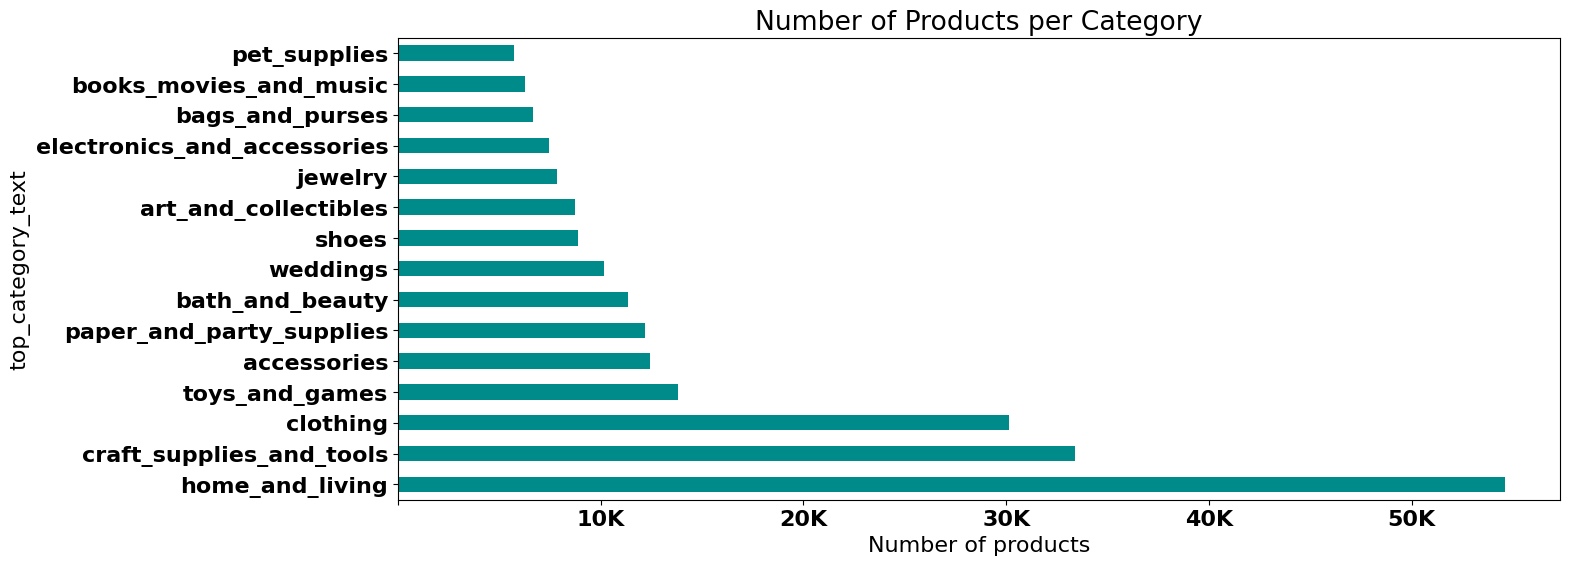

In [24]:
figsize = (15, 6)
column = 'top_category_text'
x_limit = 60000
x_step = 10000
color = 'darkcyan'

figure, ax = plt.subplots(figsize=figsize)
pd.value_counts(
    train_parquet_df[column],
    sort=True, ascending=False).plot.barh(color=color)
plt.title(f"Number of Products per Category")
xlabels = [f'{x // 1000:,}K' for x in range(0, x_limit, x_step)]
plt.xticks(range(0, x_limit, x_step), xlabels)
plt.xlabel('Number of products')
plt.setp(ax.get_xticklabels()[0], visible=False)
plt.show()

In [25]:
f"Number of bottom categories in train: {len(train_parquet_df['bottom_category_text'].unique()):,}"

'Number of bottom categories in train: 2,609'

## Cleaning and Data Processing

In [51]:
df_train = train_parquet_df.copy()

In [52]:
print(type(df_train))

<class 'pandas.core.frame.DataFrame'>


In [53]:
print(df_train.columns)

Index(['product_id', 'title', 'description', 'tags', 'type', 'room',
       'craft_type', 'recipient', 'material', 'occasion', 'holiday',
       'art_subject', 'style', 'shape', 'pattern', 'bottom_category_id',
       'bottom_category_text', 'top_category_id', 'top_category_text',
       'primary_color_id', 'primary_color_text', 'secondary_color_id',
       'secondary_color_text', 'image/encoded', 'image/width', 'image/height'],
      dtype='object')


In [54]:
df_train.head(4)

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text,image/encoded,image/width,image/height
0,699437355,Children&#39;s circle skirt BLUE GALAXY made o...,The fuxandfriends children&#39;s full circle s...,,physical,,,,,,...,clothing.girls_clothing.skirts,5,clothing,2,blue,2,blue,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,426
1,1323699538,"Cow Birthday Tutu for kids, Farm Theme Bday Ou...",💄This listing is for the TUTU ONLY (double rib...,"birthday outfit,girls birthday shirt,Tutu outf...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,11,pink,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,475
2,1142910558,"Zebra print tutu, animal print Skirt, World bo...",All tutus are handmade to order with two layer...,"black and white tutu,striped skirt,zebra tutu,...",physical,,,,,,...,clothing.girls_clothing.skirts,5,clothing,17,white,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,396
3,1320296928,"Lilac Tutu Rainbow Dots // Girl&#39;s Tutu, Tu...",Step aside because the princess pop star is he...,"tutu,girls skirt,sparkling tutu,fun skirt,ball...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,12,purple,13,rainbow,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570


In [55]:
#to check unique values in columns 
for index in list(df_train.select_dtypes(include='object').columns):
  print(f'{index} has {len(pd.unique(df_train[index]))} values')

title has 224252 values
description has 216129 values
tags has 185370 values
type has 3 values
room has 19 values
craft_type has 78 values
recipient has 26 values
material has 77 values
occasion has 63 values
holiday has 21 values
art_subject has 40 values
style has 93 values
shape has 49 values
pattern has 41 values
bottom_category_text has 2609 values
top_category_text has 15 values
primary_color_text has 19 values
secondary_color_text has 19 values
image/encoded has 228155 values


In [56]:
##checking the percentage of missing records
df_train.isna().mean()*100

product_id              0.0
title                   0.0
description             0.0
tags                    0.0
type                    0.0
room                    0.0
craft_type              0.0
recipient               0.0
material                0.0
occasion                0.0
holiday                 0.0
art_subject             0.0
style                   0.0
shape                   0.0
pattern                 0.0
bottom_category_id      0.0
bottom_category_text    0.0
top_category_id         0.0
top_category_text       0.0
primary_color_id        0.0
primary_color_text      0.0
secondary_color_id      0.0
secondary_color_text    0.0
image/encoded           0.0
image/width             0.0
image/height            0.0
dtype: float64

In [57]:
columns_to_drop = ["type", "room", "craft_type", "recipient", "material", "occasion", "holiday", "art_subject", "style", "shape", "pattern", "image/encoded", "image/width", "image/height"]

In [58]:
df_train = df_train.drop(columns=columns_to_drop, errors='ignore')

In [59]:
df_train.head(5)

,product_id,title,description,tags,bottom_category_id,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text
0,699437355,Children&#39;s circle skirt BLUE GALAXY made o...,The fuxandfriends children&#39;s full circle s...,,426,clothing.girls_clothing.skirts,5,clothing,2,blue,2,blue
1,1323699538,"Cow Birthday Tutu for kids, Farm Theme Bday Ou...",💄This listing is for the TUTU ONLY (double rib...,"birthday outfit,girls birthday shirt,Tutu outf...",426,clothing.girls_clothing.skirts,5,clothing,11,pink,1,black
2,1142910558,"Zebra print tutu, animal print Skirt, World bo...",All tutus are handmade to order with two layer...,"black and white tutu,striped skirt,zebra tutu,...",426,clothing.girls_clothing.skirts,5,clothing,17,white,1,black
3,1320296928,"Lilac Tutu Rainbow Dots // Girl&#39;s Tutu, Tu...",Step aside because the princess pop star is he...,"tutu,girls skirt,sparkling tutu,fun skirt,ball...",426,clothing.girls_clothing.skirts,5,clothing,12,purple,13,rainbow
4,854901795,Bumblebee tutu yellow and black tutu halloween...,"Sparkle, shimmer, twirl and spin,\nThis tutu&#...","dog tutu,fluffy tutu,dance tutu,skirt,flower g...",426,clothing.girls_clothing.skirts,5,clothing,18,yellow,1,black


In [60]:
print(df_train.columns)

Index(['product_id', 'title', 'description', 'tags', 'bottom_category_id',
       'bottom_category_text', 'top_category_id', 'top_category_text',
       'primary_color_id', 'primary_color_text', 'secondary_color_id',
       'secondary_color_text'],
      dtype='object')


In [61]:
df_train.to_csv("PotentialTrainingData.csv", index = False)

In [62]:
!pip install nltk


In [63]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\OMKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\OMKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [64]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Ensure you have the necessary nltk resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to clean text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove emojis and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Function to remove stopwords and apply lemmatization
def process_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    # Tokenization (splitting text into words)
    words = text.split()
    # Remove stopwords and lemmatize
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    
    return ' '.join(filtered_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\OMKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\OMKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [65]:
# List of columns to preprocess
text_columns = ['title', 'description', 'tags',
       'bottom_category_text', 'top_category_text', 'primary_color_text',
       'secondary_color_text']

for column in text_columns:
    df_train[column] = df_train[column].astype(str).apply(clean_text).apply(process_text)

In [67]:
df_train.head(5)

,product_id,title,description,tags,bottom_category_id,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text
0,699437355,Childrens circle skirt BLUE GALAXY made light ...,fuxandfriends childrens full circle skirt exhi...,,426,clothinggirls_clothingskirts,5,clothing,2,blue,2,blue
1,1323699538,Cow Birthday Tutu kid Farm Theme Bday Outfit P...,listing TUTU double ribbion include shirtany p...,birthday outfitgirls birthday shirtTutu outfit...,426,clothinggirls_clothingskirts,5,clothing,11,pink,1,black
2,1142910558,Zebra print tutu animal print Skirt World book...,tutu handmade order two layer tulle strip fabr...,black white tutustriped skirtzebra tutusafaris...,426,clothinggirls_clothingskirts,5,clothing,17,white,1,black
3,1320296928,Lilac Tutu Rainbow Dots Girls Tutu Tulle Skirt...,Step aside princess pop star win heart Made hi...,tutugirls skirtsparkling tutufun skirtballet t...,426,clothinggirls_clothingskirts,5,clothing,12,purple,13,rainbow
4,854901795,Bumblebee tutu yellow black tutu halloween tut...,Sparkle shimmer twirl spinnThis tutu fun begin...,dog tutufluffy tutudance tutuskirtflower girl ...,426,clothinggirls_clothingskirts,5,clothing,18,yellow,1,black


In [68]:
df_train.to_csv("CleanedTextDF.csv", index = False)

In [ ]:
df_train = pd.read_csv

In [69]:
print(df_train.columns)

Index(['product_id', 'title', 'description', 'tags', 'bottom_category_id',
       'bottom_category_text', 'top_category_id', 'top_category_text',
       'primary_color_id', 'primary_color_text', 'secondary_color_id',
       'secondary_color_text'],
      dtype='object')


In [70]:
df_train['combine'] = df_train['title'] + ' ' + df_train['description'] + ' ' + df_train['tags']

In [71]:
print(df_train.columns)

Index(['product_id', 'title', 'description', 'tags', 'bottom_category_id',
       'bottom_category_text', 'top_category_id', 'top_category_text',
       'primary_color_id', 'primary_color_text', 'secondary_color_id',
       'secondary_color_text', 'combine'],
      dtype='object')


# Logistic Regression 

### top_category_id

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + int(len(df_train) % batch_size > 0)

# Initialize logistic regression model
model_top = LogisticRegression(max_iter=1000)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Initialize lists to store true and predicted values
y_true_train = []
y_pred_train = []
y_true_val = []
y_pred_val = []

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training Progress")

# Iterate over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_train))
    
    # Extract features and target for this batch
    X_text = df_train['combine'][start_idx:end_idx]
    y = df_train['top_category_id'][start_idx:end_idx]

    # Vectorize text data
    X = vectorizer.fit_transform(X_text)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model_top.fit(X_train, y_train)

    # Predict on train and validation sets
    y_pred_train_batch = model_top.predict(X_train)
    y_true_train.extend(y_train)
    y_pred_train.extend(y_pred_train_batch)

    y_pred_val_batch = model_top.predict(X_test)
    y_true_val.extend(y_test)
    y_pred_val.extend(y_pred_val_batch)

    # Calculate evaluation metrics
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted')
    train_f1_score = f1_score(y_true_train, y_pred_train, average='weighted')
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted')
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    
    # Update progress bar
    pbar.update(1)
    pbar.set_postfix({"Train F1 Score": train_f1_score, "Val F1 Score": val_f1_score})

# Close the progress bar
pbar.close()

# Print final evaluation metrics
print("Final Metrics:")
print("Train - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(train_recall, train_f1_score, train_accuracy))
print("Val - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(val_recall, val_f1_score, val_accuracy))

Training Progress: 100%|█████████████████████| 12/12 [00:53<00:00,  4.48s/it, Train F1 Score=0.997, Val F1 Score=0.903]

Final Metrics:
Train - Recall: 0.9972, F1 Score: 0.9972, Accuracy: 0.9972
Val - Recall: 0.9030, F1 Score: 0.9026, Accuracy: 0.9030


### bottom_category_id

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + int(len(df_train) % batch_size > 0)

# Initialize logistic regression model
model_top = LogisticRegression(max_iter=1000)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Initialize lists to store true and predicted values
y_true_train = []
y_pred_train = []
y_true_val = []
y_pred_val = []

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training Progress")

# Iterate over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_train))
    
    # Extract features and target for this batch
    X_text = df_train['combine'][start_idx:end_idx]
    y = df_train['bottom_category_id'][start_idx:end_idx]

    # Vectorize text data
    X = vectorizer.fit_transform(X_text)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model_top.fit(X_train, y_train)

    # Predict on train and validation sets
    y_pred_train_batch = model_top.predict(X_train)
    y_true_train.extend(y_train)
    y_pred_train.extend(y_pred_train_batch)

    y_pred_val_batch = model_top.predict(X_test)
    y_true_val.extend(y_test)
    y_pred_val.extend(y_pred_val_batch)

    # Calculate evaluation metrics
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted')
    train_f1_score = f1_score(y_true_train, y_pred_train, average='weighted')
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted')
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    
    # Update progress bar
    pbar.update(1)
    pbar.set_postfix({"Train F1 Score": train_f1_score, "Val F1 Score": val_f1_score})

# Close the progress bar
pbar.close()

# Print final evaluation metrics
print("Final Metrics:")
print("Train - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(train_recall, train_f1_score, train_accuracy))
print("Val - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(val_recall, val_f1_score, val_accuracy))

Training Progress: 100%|█████████████████████| 12/12 [08:18<00:00, 41.53s/it, Train F1 Score=0.997, Val F1 Score=0.828]

Final Metrics:
Train - Recall: 0.9968, F1 Score: 0.9972, Accuracy: 0.9968
Val - Recall: 0.8250, F1 Score: 0.8280, Accuracy: 0.8250


### primary_color_id

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + int(len(df_train) % batch_size > 0)

# Initialize logistic regression model
model_top = LogisticRegression(max_iter=1000)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Initialize lists to store true and predicted values
y_true_train = []
y_pred_train = []
y_true_val = []
y_pred_val = []

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training Progress")

# Iterate over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_train))
    
    # Extract features and target for this batch
    X_text = df_train['combine'][start_idx:end_idx]
    y = df_train['primary_color_id'][start_idx:end_idx]

    # Vectorize text data
    X = vectorizer.fit_transform(X_text)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model_top.fit(X_train, y_train)

    # Predict on train and validation sets
    y_pred_train_batch = model_top.predict(X_train)
    y_true_train.extend(y_train)
    y_pred_train.extend(y_pred_train_batch)

    y_pred_val_batch = model_top.predict(X_test)
    y_true_val.extend(y_test)
    y_pred_val.extend(y_pred_val_batch)

    # Calculate evaluation metrics
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted')
    train_f1_score = f1_score(y_true_train, y_pred_train, average='weighted')
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted')
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    
    # Update progress bar
    pbar.update(1)
    pbar.set_postfix({"Train F1 Score": train_f1_score, "Val F1 Score": val_f1_score})

# Close the progress bar
pbar.close()

# Print final evaluation metrics
print("Final Metrics:")
print("Train - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(train_recall, train_f1_score, train_accuracy))
print("Val - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(val_recall, val_f1_score, val_accuracy))

Training Progress: 100%|█████████████████████| 12/12 [03:10<00:00, 15.91s/it, Train F1 Score=0.983, Val F1 Score=0.415]

Final Metrics:
Train - Recall: 0.9831, F1 Score: 0.9832, Accuracy: 0.9831
Val - Recall: 0.4174, F1 Score: 0.4152, Accuracy: 0.4174


### secondary_color_id

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + int(len(df_train) % batch_size > 0)

# Initialize logistic regression model
model_top = LogisticRegression(max_iter=1000)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Initialize lists to store true and predicted values
y_true_train = []
y_pred_train = []
y_true_val = []
y_pred_val = []

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training Progress")

# Iterate over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_train))
    
    # Extract features and target for this batch
    X_text = df_train['combine'][start_idx:end_idx]
    y = df_train['secondary_color_id'][start_idx:end_idx]

    # Vectorize text data
    X = vectorizer.fit_transform(X_text)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model_top.fit(X_train, y_train)

    # Predict on train and validation sets
    y_pred_train_batch = model_top.predict(X_train)
    y_true_train.extend(y_train)
    y_pred_train.extend(y_pred_train_batch)

    y_pred_val_batch = model_top.predict(X_test)
    y_true_val.extend(y_test)
    y_pred_val.extend(y_pred_val_batch)

    # Calculate evaluation metrics
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted')
    train_f1_score = f1_score(y_true_train, y_pred_train, average='weighted')
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted')
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    
    # Update progress bar
    pbar.update(1)
    pbar.set_postfix({"Train F1 Score": train_f1_score, "Val F1 Score": val_f1_score})

# Close the progress bar
pbar.close()

# Print final evaluation metrics
print("Final Metrics:")
print("Train - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(train_recall, train_f1_score, train_accuracy))
print("Val - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(val_recall, val_f1_score, val_accuracy))

Training Progress: 100%|█████████████████████| 12/12 [03:32<00:00, 17.70s/it, Train F1 Score=0.978, Val F1 Score=0.297]

Final Metrics:
Train - Recall: 0.9777, F1 Score: 0.9777, Accuracy: 0.9777
Val - Recall: 0.2997, F1 Score: 0.2970, Accuracy: 0.2997


# SGDClassifier

### top_category_id

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + int(len(df_train) % batch_size > 0)

# Initialize logistic regression model
model_top = SGDClassifier(max_iter=1000)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Initialize lists to store true and predicted values
y_true_train = []
y_pred_train = []
y_true_val = []
y_pred_val = []

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training Progress")

# Iterate over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_train))
    
    # Extract features and target for this batch
    X_text = df_train['combine'][start_idx:end_idx]
    y = df_train['top_category_id'][start_idx:end_idx]

    # Vectorize text data
    X = vectorizer.fit_transform(X_text)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model_top.fit(X_train, y_train)

    # Predict on train and validation sets
    y_pred_train_batch = model_top.predict(X_train)
    y_true_train.extend(y_train)
    y_pred_train.extend(y_pred_train_batch)

    y_pred_val_batch = model_top.predict(X_test)
    y_true_val.extend(y_test)
    y_pred_val.extend(y_pred_val_batch)

    # Calculate evaluation metrics
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted')
    train_f1_score = f1_score(y_true_train, y_pred_train, average='weighted')
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted')
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    
    # Update progress bar
    pbar.update(1)
    pbar.set_postfix({"Train F1 Score": train_f1_score, "Val F1 Score": val_f1_score})

# Close the progress bar
pbar.close()

# Print final evaluation metrics
print("Final Metrics:")
print("Train - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(train_recall, train_f1_score, train_accuracy))
print("Val - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(val_recall, val_f1_score, val_accuracy))

Training Progress: 100%|███████████████████████| 12/12 [00:34<00:00,  2.85s/it, Train F1 Score=0.995, Val F1 Score=0.9]

Final Metrics:
Train - Recall: 0.9952, F1 Score: 0.9952, Accuracy: 0.9952
Val - Recall: 0.9001, F1 Score: 0.8998, Accuracy: 0.9001


### bottom_category_id

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + int(len(df_train) % batch_size > 0)

# Initialize logistic regression model
model_top = SGDClassifier(max_iter=1000)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Initialize lists to store true and predicted values
y_true_train = []
y_pred_train = []
y_true_val = []
y_pred_val = []

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training Progress")

# Iterate over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_train))
    
    # Extract features and target for this batch
    X_text = df_train['combine'][start_idx:end_idx]
    y = df_train['bottom_category_id'][start_idx:end_idx]

    # Vectorize text data
    X = vectorizer.fit_transform(X_text)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model_top.fit(X_train, y_train)

    # Predict on train and validation sets
    y_pred_train_batch = model_top.predict(X_train)
    y_true_train.extend(y_train)
    y_pred_train.extend(y_pred_train_batch)

    y_pred_val_batch = model_top.predict(X_test)
    y_true_val.extend(y_test)
    y_pred_val.extend(y_pred_val_batch)

    # Calculate evaluation metrics
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted')
    train_f1_score = f1_score(y_true_train, y_pred_train, average='weighted')
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted')
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    
    # Update progress bar
    pbar.update(1)
    pbar.set_postfix({"Train F1 Score": train_f1_score, "Val F1 Score": val_f1_score})

# Close the progress bar
pbar.close()

# Print final evaluation metrics
print("Final Metrics:")
print("Train - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(train_recall, train_f1_score, train_accuracy))
print("Val - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(val_recall, val_f1_score, val_accuracy))

Training Progress: 100%|█████████████████████| 12/12 [01:40<00:00,  8.35s/it, Train F1 Score=0.995, Val F1 Score=0.801]

Final Metrics:
Train - Recall: 0.9947, F1 Score: 0.9951, Accuracy: 0.9947
Val - Recall: 0.8025, F1 Score: 0.8014, Accuracy: 0.8025


### primary_color_id

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + int(len(df_train) % batch_size > 0)

# Initialize logistic regression model
model_top = SGDClassifier(max_iter=1000)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Initialize lists to store true and predicted values
y_true_train = []
y_pred_train = []
y_true_val = []
y_pred_val = []

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training Progress")

# Iterate over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_train))
    
    # Extract features and target for this batch
    X_text = df_train['combine'][start_idx:end_idx]
    y = df_train['primary_color_id'][start_idx:end_idx]

    # Vectorize text data
    X = vectorizer.fit_transform(X_text)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model_top.fit(X_train, y_train)

    # Predict on train and validation sets
    y_pred_train_batch = model_top.predict(X_train)
    y_true_train.extend(y_train)
    y_pred_train.extend(y_pred_train_batch)

    y_pred_val_batch = model_top.predict(X_test)
    y_true_val.extend(y_test)
    y_pred_val.extend(y_pred_val_batch)

    # Calculate evaluation metrics
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted')
    train_f1_score = f1_score(y_true_train, y_pred_train, average='weighted')
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted')
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    
    # Update progress bar
    pbar.update(1)
    pbar.set_postfix({"Train F1 Score": train_f1_score, "Val F1 Score": val_f1_score})

# Close the progress bar
pbar.close()

# Print final evaluation metrics
print("Final Metrics:")
print("Train - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(train_recall, train_f1_score, train_accuracy))
print("Val - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(val_recall, val_f1_score, val_accuracy))

Training Progress: 100%|██████████████████████| 12/12 [00:50<00:00,  4.19s/it, Train F1 Score=0.94, Val F1 Score=0.392]

Final Metrics:
Train - Recall: 0.9397, F1 Score: 0.9402, Accuracy: 0.9397
Val - Recall: 0.3934, F1 Score: 0.3925, Accuracy: 0.3934


### secondary_color_id

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + int(len(df_train) % batch_size > 0)

# Initialize logistic regression model
model_top = SGDClassifier(max_iter=1000)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Initialize lists to store true and predicted values
y_true_train = []
y_pred_train = []
y_true_val = []
y_pred_val = []

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training Progress")

# Iterate over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_train))
    
    # Extract features and target for this batch
    X_text = df_train['combine'][start_idx:end_idx]
    y = df_train['secondary_color_id'][start_idx:end_idx]

    # Vectorize text data
    X = vectorizer.fit_transform(X_text)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model_top.fit(X_train, y_train)

    # Predict on train and validation sets
    y_pred_train_batch = model_top.predict(X_train)
    y_true_train.extend(y_train)
    y_pred_train.extend(y_pred_train_batch)

    y_pred_val_batch = model_top.predict(X_test)
    y_true_val.extend(y_test)
    y_pred_val.extend(y_pred_val_batch)

    # Calculate evaluation metrics
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted')
    train_f1_score = f1_score(y_true_train, y_pred_train, average='weighted')
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted')
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    
    # Update progress bar
    pbar.update(1)
    pbar.set_postfix({"Train F1 Score": train_f1_score, "Val F1 Score": val_f1_score})

# Close the progress bar
pbar.close()

# Print final evaluation metrics
print("Final Metrics:")
print("Train - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(train_recall, train_f1_score, train_accuracy))
print("Val - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(val_recall, val_f1_score, val_accuracy))

Training Progress: 100%|██████████████████████| 12/12 [00:54<00:00,  4.54s/it, Train F1 Score=0.922, Val F1 Score=0.28]

Final Metrics:
Train - Recall: 0.9220, F1 Score: 0.9222, Accuracy: 0.9220
Val - Recall: 0.2821, F1 Score: 0.2796, Accuracy: 0.2821


# KNN Classifier

### top_category_id

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + int(len(df_train) % batch_size > 0)

# Initialize KNN classifier
model_top = KNeighborsClassifier(
    n_neighbors=5,
    n_jobs=-1  # Use all available CPU cores
)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
vectorizer.fit(df_train['combine'])  # Fit vectorizer on the entire dataset at once if possible

# Initialize lists to store true and predicted values
y_true_train = []
y_pred_train = []
y_true_val = []
y_pred_val = []

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training and Prediction Progress")

# Since KNN uses all the data for training, we will split the data first and then use batches for prediction
X = vectorizer.transform(df_train['combine'])
y = df_train['top_category_id']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the whole training set
model_top.fit(X_train, y_train)

# Predict in batches to manage memory usage
for i in range(0, X_val.shape[0], batch_size):
    end_idx = min(i + batch_size, X_val.shape[0])
    
    # Predict on validation set
    y_pred_val_batch = model_top.predict(X_val[i:end_idx])
    y_true_val.extend(y_val[i:end_idx].tolist())
    y_pred_val.extend(y_pred_val_batch)

    # Calculate evaluation metrics for the batch
    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted')
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    
    # Update progress bar
    pbar.update(1)
    pbar.set_postfix({"Val F1 Score": val_f1_score})

# Close the progress bar
pbar.close()

# Print final evaluation metrics for the validation set
print("Validation Metrics:")
print("Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(val_recall, val_f1_score, val_accuracy))


Training and Prediction Progress:  25%|███████▌                      | 3/12 [04:56<14:48, 98.68s/it, Val F1 Score=0.71]

Validation Metrics:
Recall: 0.7079, F1 Score: 0.7099, Accuracy: 0.7079


# bottom_category_id

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size
batch_size = 20000

# Load and prepare your dataset
# df_train should be pre-loaded with appropriate text and labels

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(df_train['combine'])  # Vectorize text data
y = df_train['bottom_category_id']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Initialize lists to store predicted and true labels
y_pred_val = []
y_true_val = []

# Initialize progress bar
num_batches = (X_val.shape[0] + batch_size - 1) // batch_size  # Calculate the number of batches required
pbar = tqdm(total=num_batches, desc="Validation Batch")

# Predict in batches to manage memory usage
for i in range(0, X_val.shape[0], batch_size):
    end_idx = min(i + batch_size, X_val.shape[0])
    y_pred_val_batch = model.predict(X_val[i:end_idx])
    y_true_val.extend(y_val[i:end_idx].tolist())
    y_pred_val.extend(y_pred_val_batch)
    pbar.update(1)  # Update progress bar after each batch

pbar.close()  # Close the progress bar after all batches are processed

# Calculate and print final evaluation metrics for the validation set
val_recall = recall_score(y_true_val, y_pred_val, average='weighted', zero_division=1)
val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted', zero_division=1)
val_accuracy = accuracy_score(y_true_val, y_pred_val)
print("Validation Metrics:")
print(f"Recall: {val_recall:.4f}, F1 Score: {val_f1_score:.4f}, Accuracy: {val_accuracy:.4f}")


Validation Batch: 100%|██████████████████████████████████████████████████████████████████| 3/3 [04:38<00:00, 92.90s/it]

Validation Metrics:
Recall: 0.4076, F1 Score: 0.4278, Accuracy: 0.4076


### primary_color_id

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size
batch_size = 20000

# Load and prepare your dataset
# df_train should be pre-loaded with appropriate text and labels

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(df_train['combine'])  # Vectorize text data
y = df_train['primary_color_id']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Initialize lists to store predicted and true labels
y_pred_val = []
y_true_val = []

# Initialize progress bar
num_batches = (X_val.shape[0] + batch_size - 1) // batch_size  # Calculate the number of batches required
pbar = tqdm(total=num_batches, desc="Validation Batch")

# Predict in batches to manage memory usage
for i in range(0, X_val.shape[0], batch_size):
    end_idx = min(i + batch_size, X_val.shape[0])
    y_pred_val_batch = model.predict(X_val[i:end_idx])
    y_true_val.extend(y_val[i:end_idx].tolist())
    y_pred_val.extend(y_pred_val_batch)
    pbar.update(1)  # Update progress bar after each batch

pbar.close()  # Close the progress bar after all batches are processed

# Calculate and print final evaluation metrics for the validation set
val_recall = recall_score(y_true_val, y_pred_val, average='weighted', zero_division=1)
val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted', zero_division=1)
val_accuracy = accuracy_score(y_true_val, y_pred_val)
print("Validation Metrics:")
print(f"Recall: {val_recall:.4f}, F1 Score: {val_f1_score:.4f}, Accuracy: {val_accuracy:.4f}")


Validation Batch: 100%|██████████████████████████████████████████████████████████████████| 3/3 [04:38<00:00, 92.94s/it]

Validation Metrics:
Recall: 0.2761, F1 Score: 0.2672, Accuracy: 0.2761


### secondary_color_id

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size
batch_size = 20000

# Load and prepare your dataset
# df_train should be pre-loaded with appropriate text and labels

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(df_train['combine'])  # Vectorize text data
y = df_train['secondary_color_id']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Initialize lists to store predicted and true labels
y_pred_val = []
y_true_val = []

# Initialize progress bar
num_batches = (X_val.shape[0] + batch_size - 1) // batch_size  # Calculate the number of batches required
pbar = tqdm(total=num_batches, desc="Validation Batch")

# Predict in batches to manage memory usage
for i in range(0, X_val.shape[0], batch_size):
    end_idx = min(i + batch_size, X_val.shape[0])
    y_pred_val_batch = model.predict(X_val[i:end_idx])
    y_true_val.extend(y_val[i:end_idx].tolist())
    y_pred_val.extend(y_pred_val_batch)
    pbar.update(1)  # Update progress bar after each batch

pbar.close()  # Close the progress bar after all batches are processed

# Calculate and print final evaluation metrics for the validation set
val_recall = recall_score(y_true_val, y_pred_val, average='weighted', zero_division=1)
val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted', zero_division=1)
val_accuracy = accuracy_score(y_true_val, y_pred_val)
print("Validation Metrics:")
print(f"Recall: {val_recall:.4f}, F1 Score: {val_f1_score:.4f}, Accuracy: {val_accuracy:.4f}")


Validation Batch: 100%|██████████████████████████████████████████████████████████████████| 3/3 [04:38<00:00, 93.00s/it]

Validation Metrics:
Recall: 0.2354, F1 Score: 0.2289, Accuracy: 0.2354


# RandomForest Classifier

### top_category_id

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + int(len(df_train) % batch_size > 0)

# Initialize Random Forest classifier
model_top = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,  # You can adjust this based on the complexity of the data
    random_state=42,
    n_jobs=-1  # Utilize all cores for faster training
)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Initialize lists to store true and predicted values
y_true_train = []
y_pred_train = []
y_true_val = []
y_pred_val = []

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training Progress")

# Iterate over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_train))
    
    # Extract features and target for this batch
    X_text = df_train['combine'][start_idx:end_idx]
    y = df_train['top_category_id'][start_idx:end_idx]

    # Vectorize text data
    X = vectorizer.fit_transform(X_text)
    
    # Split data into train and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model_top.fit(X_train, y_train)

    # Predict on train and validation sets
    y_pred_train_batch = model_top.predict(X_train)
    y_true_train.extend(y_train)
    y_pred_train.extend(y_pred_train_batch)

    y_pred_val_batch = model_top.predict(X_test)
    y_true_val.extend(y_test)
    y_pred_val.extend(y_pred_val_batch)

    # Calculate evaluation metrics
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted')
    train_f1_score = f1_score(y_true_train, y_pred_train, average='weighted')
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted')
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    
    # Update progress bar
    pbar.update(1)
    pbar.set_postfix({"Train F1 Score": train_f1_score, "Val F1 Score": val_f1_score})

# Close the progress bar
pbar.close()

# Print final evaluation metrics
print("Final Metrics:")
print("Train - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(train_recall, train_f1_score, train_accuracy))
print("Val - Recall: {:.4f}, F1 Score: {:.4f}, Accuracy: {:.4f}".format(val_recall, val_f1_score, val_accuracy))


Training Progress: 100%|█████████████████████| 12/12 [01:38<00:00,  8.17s/it, Train F1 Score=0.998, Val F1 Score=0.859]

Final Metrics:
Train - Recall: 0.9977, F1 Score: 0.9977, Accuracy: 0.9977
Val - Recall: 0.8615, F1 Score: 0.8594, Accuracy: 0.8615


In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
vectorizer.fit(df_train['combine'])  # Assuming 'combine' is your text data

X = vectorizer.transform(df_train['combine'])
y = df_train['top_category_id']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
model_top = MultinomialNB()

# Train model
model_top.fit(X_train, y_train)

# Evaluate model
y_pred_val = model_top.predict(X_val)
val_recall = recall_score(y_val, y_pred_val, average='weighted')
val_f1_score = f1_score(y_val, y_pred_val, average='weighted')
val_accuracy = accuracy_score(y_val, y_pred_val)

# Output metrics
print("Validation Metrics:")
print(f"Recall: {val_recall:.4f}, F1 Score: {val_f1_score:.4f}, Accuracy: {val_accuracy:.4f}")


Validation Metrics:
Recall: 0.7456, F1 Score: 0.7459, Accuracy: 0.7456


In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Load or define your dataset
# df_train should be a DataFrame containing at least two columns: one with the text data and one with the target labels
# Example: df_train = pd.DataFrame({'text': ["your text data here"], 'label': [0, 1, etc]})

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Vectorize the text data
X = vectorizer.fit_transform(df_train['combine'])  # Replace 'text' with the name of your text column
y = df_train['top_category_id']  # Replace 'label' with the name of your target column

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = model.predict(X_val)

# Evaluate the model
val_recall = recall_score(y_val, y_pred_val, average='weighted')
val_f1_score = f1_score(y_val, y_pred_val, average='weighted')
val_accuracy = accuracy_score(y_val, y_pred_val)

# Output the evaluation metrics
print("Validation Metrics:")
print(f"Recall: {val_recall:.4f}, F1 Score: {val_f1_score:.4f}, Accuracy: {val_accuracy:.4f}")


Validation Metrics:
Recall: 0.6971, F1 Score: 0.6957, Accuracy: 0.6971


In [131]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + (len(df_train) % batch_size > 0)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training Progress")

# Initialize lists to store true and predicted values for all categories
y_true_train_top, y_pred_train_top = [], []
y_true_val_top, y_pred_val_top = [], []
y_true_train_bottom, y_pred_train_bottom = [], []
y_true_val_bottom, y_pred_val_bottom = [], []
y_true_train_primary, y_pred_train_primary = [], []
y_true_val_primary, y_pred_val_primary = [], []
y_true_train_secondary, y_pred_train_secondary = [], []
y_true_val_secondary, y_pred_val_secondary = [], []

# Loop over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_train))
    
    X_text = df_train['combine'][start_idx:end_idx]
    y_top = df_train['top_category_id'][start_idx:end_idx]
    y_bottom = df_train['bottom_category_id'][start_idx:end_idx]
    y_primary = df_train['primary_color_id'][start_idx:end_idx]
    y_secondary = df_train['secondary_color_id'][start_idx:end_idx]

    X = vectorizer.fit_transform(X_text)
    X_train, X_test, y_train_top, y_test_top = train_test_split(X, y_top, test_size=0.2, random_state=42)
    _, _, y_train_bottom, y_test_bottom = train_test_split(X, y_bottom, test_size=0.2, random_state=42)
    _, _, y_train_primary, y_test_primary = train_test_split(X, y_primary, test_size=0.2, random_state=42)
    _, _, y_train_secondary, y_test_secondary = train_test_split(X, y_secondary, test_size=0.2, random_state=42)

    # Initialize logistic regression models
    model_top = LogisticRegression(max_iter=1000)
    model_bottom = LogisticRegression(max_iter=1000)
    model_primary = LogisticRegression(max_iter=1000)
    model_secondary = LogisticRegression(max_iter=1000)

    # Fit models
    model_top.fit(X_train, y_train_top)
    model_bottom.fit(X_train, y_train_bottom)
    model_primary.fit(X_train, y_train_primary)
    model_secondary.fit(X_train, y_train_secondary)

    # Predictions for each category
    y_pred_train_top_batch = model_top.predict(X_train)
    y_true_train_top.extend(y_train_top)
    y_pred_train_top.extend(y_pred_train_top_batch)

    y_pred_val_top_batch = model_top.predict(X_test)
    y_true_val_top.extend(y_test_top)
    y_pred_val_top.extend(y_pred_val_top_batch)

    y_pred_train_bottom_batch = model_bottom.predict(X_train)
    y_true_train_bottom.extend(y_train_bottom)
    y_pred_train_bottom.extend(y_pred_train_bottom_batch)

    y_pred_val_bottom_batch = model_bottom.predict(X_test)
    y_true_val_bottom.extend(y_test_bottom)
    y_pred_val_bottom.extend(y_pred_val_bottom_batch)

    y_pred_train_primary_batch = model_primary.predict(X_train)
    y_true_train_primary.extend(y_train_primary)
    y_pred_train_primary.extend(y_pred_train_primary_batch)

    y_pred_val_primary_batch = model_primary.predict(X_test)
    y_true_val_primary.extend(y_test_primary)
    y_pred_val_primary.extend(y_pred_val_primary_batch)

    y_pred_train_secondary_batch = model_secondary.predict(X_train)
    y_true_train_secondary.extend(y_train_secondary)
    y_pred_train_secondary.extend(y_pred_train_secondary_batch)

    y_pred_val_secondary_batch = model_secondary.predict(X_test)
    y_true_val_secondary.extend(y_test_secondary)
    y_pred_val_secondary.extend(y_pred_val_secondary_batch)

    # Update progress bar
    pbar.update(1)

# Close the progress bar
pbar.close()

# Calculate and print evaluation metrics for each category
categories = ['Top', 'Bottom', 'Primary', 'Secondary']
true_train_lists = [y_true_train_top, y_true_train_bottom, y_true_train_primary, y_true_train_secondary]
pred_train_lists = [y_pred_train_top, y_pred_train_bottom, y_pred_train_primary, y_pred_train_secondary]
true_val_lists = [y_true_val_top, y_true_val_bottom, y_true_val_primary, y_true_val_secondary]
pred_val_lists = [y_pred_val_top, y_pred_val_bottom, y_pred_val_primary, y_pred_val_secondary]

for category, y_true_train, y_pred_train, y_true_val, y_pred_val in zip(categories, true_train_lists, pred_train_lists, true_val_lists, pred_val_lists):
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted')
    train_f1_score = f1_score(y_true_train, y_pred_train, average='weighted')
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted')
    val_accuracy = accuracy_score(y_true_val, y_pred_val)

    print(f"{category} Category - Train Recall: {train_recall:.4f}, F1 Score: {train_f1_score:.4f}, Accuracy: {train_accuracy:.4f}")
    print(f"{category} Category - Val Recall: {val_recall:.4f}, F1 Score: {val_f1_score:.4f}, Accuracy: {val_accuracy:.4f}")


Training Progress: 100%|███████████████████████████████████████████████████████████████| 12/12 [15:03<00:00, 75.33s/it]


Top Category - Train Recall: 0.9972, F1 Score: 0.9972, Accuracy: 0.9972
Top Category - Val Recall: 0.9030, F1 Score: 0.9026, Accuracy: 0.9030
Bottom Category - Train Recall: 0.9968, F1 Score: 0.9972, Accuracy: 0.9968
Bottom Category - Val Recall: 0.8250, F1 Score: 0.8280, Accuracy: 0.8250
Primary Category - Train Recall: 0.9831, F1 Score: 0.9832, Accuracy: 0.9831
Primary Category - Val Recall: 0.4174, F1 Score: 0.4152, Accuracy: 0.4174
Secondary Category - Train Recall: 0.9777, F1 Score: 0.9777, Accuracy: 0.9777
Secondary Category - Val Recall: 0.2997, F1 Score: 0.2970, Accuracy: 0.2997


# Random Forest Multiple Regressor

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from tqdm import tqdm

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + (len(df_train) % batch_size > 0)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Initialize progress bar
pbar = tqdm(total=num_batches, desc="Training Progress")

# Initialize lists to store true and predicted values for all categories
y_true_train_top, y_pred_train_top = [], []
y_true_val_top, y_pred_val_top = [], []
y_true_train_bottom, y_pred_train_bottom = [], []
y_true_val_bottom, y_pred_val_bottom = [], []
y_true_train_primary, y_pred_train_primary = [], []
y_true_val_primary, y_pred_val_primary = [], []
y_true_train_secondary, y_pred_train_secondary = [], []
y_true_val_secondary, y_pred_val_secondary = [], []

# Loop over batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_train))
    
    X_text = df_train['combine'][start_idx:end_idx]
    y_top = df_train['top_category_id'][start_idx:end_idx]
    y_bottom = df_train['bottom_category_id'][start_idx:end_idx]
    y_primary = df_train['primary_color_id'][start_idx:end_idx]
    y_secondary = df_train['secondary_color_id'][start_idx:end_idx]

    # Fit vectorizer only once before the loop if this line is inside the loop by mistake
    X = vectorizer.fit_transform(X_text)
    
    X_train, X_test, y_train_top, y_test_top = train_test_split(X, y_top, test_size=0.2, random_state=42)
    _, _, y_train_bottom, y_test_bottom = train_test_split(X, y_bottom, test_size=0.2, random_state=42)
    _, _, y_train_primary, y_test_primary = train_test_split(X, y_primary, test_size=0.2, random_state=42)
    _, _, y_train_secondary, y_test_secondary = train_test_split(X, y_secondary, test_size=0.2, random_state=42)

    # Initialize random forest models
    model_top_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    model_bottom_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    model_primary_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    model_secondary_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

    # Fit models
    model_top_rf.fit(X_train, y_train_top)
    model_bottom_rf.fit(X_train, y_train_bottom)
    model_primary_rf.fit(X_train, y_train_primary)
    model_secondary_rf.fit(X_train, y_train_secondary)

    # Predictions for each category
    y_pred_train_top_batch = model_top_rf.predict(X_train)
    y_true_train_top.extend(y_train_top)
    y_pred_train_top.extend(y_pred_train_top_batch)

    y_pred_val_top_batch = model_top_rf.predict(X_test)
    y_true_val_top.extend(y_test_top)
    y_pred_val_top.extend(y_pred_val_top_batch)

    y_pred_train_bottom_batch = model_bottom_rf.predict(X_train)
    y_true_train_bottom.extend(y_train_bottom)
    y_pred_train_bottom.extend(y_pred_train_bottom_batch)

    y_pred_val_bottom_batch = model_bottom_rf.predict(X_test)
    y_true_val_bottom.extend(y_test_bottom)
    y_pred_val_bottom.extend(y_pred_val_bottom_batch)

    y_pred_train_primary_batch = model_primary_rf.predict(X_train)
    y_true_train_primary.extend(y_train_primary)
    y_pred_train_primary.extend(y_pred_train_primary_batch)

    y_pred_val_primary_batch = model_primary_rf.predict(X_test)
    y_true_val_primary.extend(y_test_primary)
    y_pred_val_primary.extend(y_pred_val_primary_batch)

    y_pred_train_secondary_batch = model_secondary_rf.predict(X_train)
    y_true_train_secondary.extend(y_train_secondary)
    y_pred_train_secondary.extend(y_pred_train_secondary_batch)

    y_pred_val_secondary_batch = model_secondary_rf.predict(X_test)
    y_true_val_secondary.extend(y_test_secondary)
    y_pred_val_secondary.extend(y_pred_val_secondary_batch)

    # Update progress bar
    pbar.update(1)

# Close the progress bar
pbar.close()

# Calculate and print evaluation metrics for each category
categories = ['Top Category', 'Bottom Category', 'Primary Color', 'Secondary Color']
true_train_lists = [y_true_train_top, y_true_train_bottom, y_true_train_primary, y_true_train_secondary]
pred_train_lists = [y_pred_train_top, y_pred_train_bottom, y_pred_train_primary, y_pred_train_secondary]
true_val_lists = [y_true_val_top, y_true_val_bottom, y_true_val_primary, y_true_val_secondary]
pred_val_lists = [y_pred_val_top, y_pred_val_bottom, y_pred_val_primary, y_pred_val_secondary]

for category, y_true_train, y_pred_train, y_true_val, y_pred_val in zip(categories, true_train_lists, pred_train_lists, true_val_lists, pred_val_lists):
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted', zero_division=1)
    train_f1_score = f1_score(y_true_train, y_pred_train, average='weighted', zero_division=1)
    train_accuracy = accuracy_score(y_true_train, y_pred_train)

    val_recall = recall_score(y_true_val, y_pred_val, average='weighted', zero_division=1)
    val_f1_score = f1_score(y_true_val, y_pred_val, average='weighted', zero_division=1)
    val_accuracy = accuracy_score(y_true_val, y_pred_val)

    print(f"{category} Category - Train Recall: {train_recall:.4f}, F1 Score: {train_f1_score:.4f}, Accuracy: {train_accuracy:.4f}")
    print(f"{category} Category - Val Recall: {val_recall:.4f}, F1 Score: {val_f1_score:.4f}, Accuracy: {val_accuracy:.4f}")


Training Progress: 100%|███████████████████████████████████████████████████████████████| 12/12 [08:54<00:00, 44.55s/it]


Top Category Category - Train Recall: 0.9977, F1 Score: 0.9977, Accuracy: 0.9977
Top Category Category - Val Recall: 0.8609, F1 Score: 0.8588, Accuracy: 0.8609
Bottom Category Category - Train Recall: 0.9971, F1 Score: 0.9974, Accuracy: 0.9971
Bottom Category Category - Val Recall: 0.8126, F1 Score: 0.8088, Accuracy: 0.8126
Primary Color Category - Train Recall: 0.9931, F1 Score: 0.9931, Accuracy: 0.9931
Primary Color Category - Val Recall: 0.4702, F1 Score: 0.4622, Accuracy: 0.4702
Secondary Color Category - Train Recall: 0.9932, F1 Score: 0.9933, Accuracy: 0.9932
Secondary Color Category - Val Recall: 0.3589, F1 Score: 0.3446, Accuracy: 0.3589


# KMeans Clusttering

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import numpy as np
import pandas as pd

# Define batch size and calculate the number of batches
batch_size = 20000
num_batches = len(df_train) // batch_size + (len(df_train) % batch_size > 0)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(df_train['combine'])

# Split data into train and test first
X_train, X_test, y_train, y_test = train_test_split(X, df_train[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']], test_size=0.2, random_state=42)

# Number of clusters for each target variable
n_clusters = 5  # Example: adjust based on domain knowledge or experimentation

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Create a function to train and predict for each target variable
def cluster_and_predict(X_train, X_test, y_train, y_test, target_name):
    # Fit KMeans to the target variable
    clusters_train = kmeans.fit_predict(y_train[target_name].values.reshape(-1, 1))
    clusters_test = kmeans.predict(y_test[target_name].values.reshape(-1, 1))

    # Initialize decision tree regressors for each cluster
    models = [DecisionTreeRegressor(random_state=42) for _ in range(n_clusters)]

    # Train Decision Tree Regressors for each cluster
    for i in range(n_clusters):
        cluster_indices = np.where(clusters_train == i)[0]
        if len(cluster_indices) > 0:
            models[i].fit(X_train[cluster_indices], y_train.iloc[cluster_indices][target_name])

    # Predict and evaluate for each cluster using Decision Tree Regressor
    predictions = np.zeros(y_test.shape[0])
    for i in range(n_clusters):
        cluster_indices = np.where(clusters_test == i)[0]
        if len(cluster_indices) > 0:
            predictions[cluster_indices] = models[i].predict(X_test[cluster_indices])

    mse = mean_squared_error(y_test[target_name], predictions)
    return mse

# Calculate MSE for each category
mse_top = cluster_and_predict(X_train, X_test, y_train, y_test, 'top_category_id')
mse_bottom = cluster_and_predict(X_train, X_test, y_train, y_test, 'bottom_category_id')
mse_primary = cluster_and_predict(X_train, X_test, y_train, y_test, 'primary_color_id')
mse_secondary = cluster_and_predict(X_train, X_test, y_train, y_test, 'secondary_color_id')

print(f"Top Category MSE: {mse_top}")
print(f"Bottom Category MSE: {mse_bottom}")
print(f"Primary Color MSE: {mse_primary}")
print(f"Secondary Color MSE: {mse_secondary}")

Top Category MSE: 0.1819816304028025
Bottom Category MSE: 104892.36272128193
Primary Color MSE: 0.8467957303175823
Secondary Color MSE: 1.115541628191076


# Test Dataset

In [5]:
# Get a list of all Test Parquet files in the folder
test_parquet_files = [file for file in os.listdir(par_test_folder_path) if file.endswith(".parquet")]

# Loop through the Train Parquet files and read them into individual DataFrames
par_test_df = []
for file in test_parquet_files:
    file_path = os.path.join(par_test_folder_path, file)
    df = pd.read_parquet(file_path)
    par_test_df.append(df)

# Concatenate the individual DataFrames into a single DataFrame
test_parquet_df = pd.concat(par_test_df, ignore_index=True)

In [6]:
# Display the merged DataFrame
test_parquet_df.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,image/encoded,image/width,image/height
0,661373440,"Classroom Valentine Favors, Valentine Pencils,...","Valentine Favors, Robots of Love Vinyl Pencil ...","Valentines day favor,kindergarten treats,valen...",physical,,kids' crafts,,,,valentine's day,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,739
1,1501009290,5 Colour Slatepencils In One Pack Order NOw,5 Colour Slatepencils In One Pack Order NOw\n\...,"slatepencils,clay,nakumatt,edibleclay",physical,,drawing & drafting,,,,,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,321
2,1105447030,"No 2 Pencils by Associated Commercial, #2 Wri...","This listing is for a dozen, unused pre sharpe...","Faber Castell,aw faber,Faber-Castell,antique p...",physical,,drawing & drafting,,,,,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,330
3,1140081090,"Personalized Carpenter Pencils, Engraved Carpe...",EtchThisOut is now offering Carpenter Pencils ...,"Personalized Pencils,Carpenter Pencils,Carpent...",physical,,drawing & drafting,,,birthday,valentine's day,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570
4,793448890,Vintage 1960&#39;s Autopoint mechanical pencil...,Vintage 1950&#39;s Autopoint mechanical pencil...,"Mechanical pencil,Autopoint pencil,Drafting pe...",physical,,calligraphy,,,,,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570


In [7]:
print(type(test_parquet_df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
print(test_parquet_df.columns)

Index(['product_id', 'title', 'description', 'tags', 'type', 'room',
       'craft_type', 'recipient', 'material', 'occasion', 'holiday',
       'art_subject', 'style', 'shape', 'pattern', 'image/encoded',
       'image/width', 'image/height'],
      dtype='object')


In [9]:
f'Number of rows in test: {len(test_parquet_df):,}'

'Number of rows in test: 25,514'

In [10]:
f"Number of unique products in test: {len(test_parquet_df['product_id'].unique()):,}"

'Number of unique products in test: 25,514'

In [11]:
f"Number of columns in test: {len(test_parquet_df.columns):,}"

'Number of columns in test: 18'

In [12]:
print(type(test_parquet_df))

<class 'pandas.core.frame.DataFrame'>


In [117]:
test_parquet_df.iloc[0]

product_id                                               661373440
title            Classroom Valentine Favors, Valentine Pencils,...
description      Valentine Favors, Robots of Love Vinyl Pencil ...
tags             Valentines day favor,kindergarten treats,valen...
type                                                      physical
room                                                              
craft_type                                            kids' crafts
recipient                                                         
material                                                          
occasion                                                          
holiday                                            valentine's day
art_subject                                                       
style                                                             
shape                                                             
pattern                                                       

In [13]:
columns_to_drop_2 = ["type", "room", "craft_type", "recipient", "material", "occasion", "holiday", "art_subject", "style", "shape", "pattern", "image/encoded", "image/width", "image/height"]

In [14]:
df_test = test_parquet_df.copy()

In [15]:
df_test = df_test.drop(columns=columns_to_drop_2, errors='ignore')

In [16]:
df_test.head()

,product_id,title,description,tags
0,661373440,"Classroom Valentine Favors, Valentine Pencils,...","Valentine Favors, Robots of Love Vinyl Pencil ...","Valentines day favor,kindergarten treats,valen..."
1,1501009290,5 Colour Slatepencils In One Pack Order NOw,5 Colour Slatepencils In One Pack Order NOw\n\...,"slatepencils,clay,nakumatt,edibleclay"
2,1105447030,"No 2 Pencils by Associated Commercial, #2 Wri...","This listing is for a dozen, unused pre sharpe...","Faber Castell,aw faber,Faber-Castell,antique p..."
3,1140081090,"Personalized Carpenter Pencils, Engraved Carpe...",EtchThisOut is now offering Carpenter Pencils ...,"Personalized Pencils,Carpenter Pencils,Carpent..."
4,793448890,Vintage 1960&#39;s Autopoint mechanical pencil...,Vintage 1950&#39;s Autopoint mechanical pencil...,"Mechanical pencil,Autopoint pencil,Drafting pe..."


In [125]:
# List of columns to preprocess
text_columns_2 = ['title', 'description', 'tags']

for column in text_columns_2:
    df_test[column] = df_test[column].astype(str).apply(clean_text).apply(process_text)

In [126]:
df_test.to_csv("CleanedFinalTestData.csv", index = False)

In [127]:
df_test['combine'] = df_test['title'] + ' ' + df_test['description'] + ' ' + df_test['tags']

In [133]:
vectorizer = CountVectorizer(max_features=10000)

# Set the batch size
batch_size = 20000

# Calculate the number of batches
num_batches = len(df_test) // batch_size + (len(df_test) % batch_size > 0)

# List to store predictions
test_pred = []

# Process in batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(df_test))

    Y = df_test['combine'][start_idx:end_idx]
    
    # Fit and transform the data using CountVectorizer
    Y = vectorizer.fit_transform(df_test['combine'])
    
    test_pred_top = model_top.predict(Y)
    test_pred_bottom = model_bottom.predict(Y)
    test_pred_primary = model_primary.predict(Y)
    test_pred_secondary = model_secondary_rf.predict(Y)
    
# Now `test_pred` contains all the predictions
print(test_pred_top)
print(test_pred_bottom)
print(test_pred_primary)
print(test_pred_secondary)

[10  5  8 ...  6  8  6]
[12426    30  2108 ...  1203  6730  6730]
[17  1  1 ... 18  1  1]
[14 17 17 ... 16 17 17]


In [141]:
import pandas as pd
import numpy as np

# Sample data simulating your variables, replace these with your actual data
# For example, if test_pred_top is an ndarray, you would convert it like this:
if isinstance(test_pred_top, np.ndarray):
    test_pred_top = pd.DataFrame(test_pred_top, columns=[f'top_{i}' for i in range(test_pred_top.shape[1])])

if isinstance(test_pred_bottom, np.ndarray):
    test_pred_bottom = pd.DataFrame(test_pred_bottom, columns=[f'bottom_{i}' for i in range(test_pred_bottom.shape[1])])

if isinstance(test_pred_primary, np.ndarray):
    test_pred_primary = pd.DataFrame(test_pred_primary, columns=[f'primary_{i}' for i in range(test_pred_primary.shape[1])])

if isinstance(test_pred_secondary, np.ndarray):
    test_pred_secondary = pd.DataFrame(test_pred_secondary, columns=[f'secondary_{i}' for i in range(test_pred_secondary.shape[1])])

# Concatenate horizontally
combined_df = pd.concat([test_pred_top, test_pred_bottom, test_pred_primary, test_pred_secondary], axis=1)

# Save to CSV
combined_df.to_csv('LastFinal.csv', index=False)


In [136]:
print(type(test_pred_top))

<class 'numpy.ndarray'>


In [17]:
print(df_test.columns)

Index(['product_id', 'title', 'description', 'tags'], dtype='object')


In [19]:
combined_df = pd.read_csv("LastFinal.csv")

In [20]:
print(combined_df.columns)

Index(['top', 'bottom', 'primary', 'secondary'], dtype='object')


In [36]:
product_id_column = df_test['product_id']

# Combine product_id_column with combined_df
new_dataframe = pd.concat([product_id_column, combined_df], axis=1)

In [37]:
print(new_dataframe.columns)

Index(['product_id', 'top', 'bottom', 'primary', 'secondary'], dtype='object')


In [38]:
new_dataframe.head()

,product_id,top,bottom,primary,secondary
0,661373440,10,12426,17,14
1,1501009290,5,30,1,17
2,1105447030,8,2108,1,17
3,1140081090,10,12426,18,17
4,793448890,5,443,2,17


In [39]:
new_dataframe.to_parquet('predictions_23262297.parquet', index=False)

In [40]:
df3 =  pd.read_parquet('predictions_23262297.parquet')

In [41]:
df3.head()

,product_id,top,bottom,primary,secondary
0,661373440,10,12426,17,14
1,1501009290,5,30,1,17
2,1105447030,8,2108,1,17
3,1140081090,10,12426,18,17
4,793448890,5,443,2,17
